In [98]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [99]:
# import datas to compare
data1_url = 'android_data/sensorfitmotion15.csv'
data2_url = 'dataset/sit_13/sub_1.csv'

data1 = pd.read_csv(data1_url, sep=';')
data2 = pd.read_csv(data2_url)

data1 = data1.dropna()
data2 = data2.dropna()

data1 = data1.drop(columns=['id'])
data2 = data2.drop(columns=['Unnamed: 0'])

In [100]:
data1.head()

,Attitude Roll,Attitude Pitch,Attitude Azimuth,Gravity X,Gravity Y,Gravity Z,Rotation Rate X,Rotation Rate Y,Rotation Rate Z,User Acceleration X,User Acceleration Y,User Acceleration Z
0,0.0179,-0.0090,-0.4051,0.018087003380060196,0.3695,"9,79967E+15",0.003465336514636874,0.001051844097673893,-0.002543375827372074,0.05742774158716202,0.3888,"9,65624E+15"
1,0.0179,-0.0090,-0.4051,0.018167980015277863,0.3696,"9,79967E+15",-0.001299900352023542,0.003339711343869567,-0.002717973431572318,0.023330021649599075,0.3697,"9,66102E+14"
2,0.0179,-0.0090,-0.4051,0.018438836559653282,0.3702,"9,79964E+15",0.0017449113074690104,0.0015745721757411957,"6,36E+11",-0.004785645287483931,0.3823,"9,66401E+15"
3,0.0179,-0.0090,-0.4051,0.01824961230158806,0.3705,"9,79963E+15",-0.0033109665382653475,0.0013148050056770444,0.0021558543667197227,-0.010169495828449726,0.3781,"9,66102E+14"
4,0.0179,-0.0090,-0.4051,0.01824961230158806,0.3705,"9,79963E+15",-0.0033109665382653475,0.0013148050056770444,0.0021558543667197227,-0.010169495828449726,0.3781,"9,66102E+14"


In [101]:
data2.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,0.3511,-0.4163,-0.0980,0.3146,0.4044,-0.8588,-0.0037,0.0096,-0.0002,0.0001,0.0003,-0.0070
1,0.3512,-0.4164,-0.0980,0.3146,0.4044,-0.8587,-0.0079,0.0075,0.0008,-0.0013,0.0023,-0.0103
2,0.3511,-0.4165,-0.0980,0.3146,0.4046,-0.8587,-0.0080,-0.0011,-0.0024,-0.0022,0.0000,-0.0067
3,0.3508,-0.4167,-0.0981,0.3143,0.4047,-0.8587,-0.0005,-0.0064,-0.0013,0.0017,0.0092,-0.0116
4,0.3509,-0.4169,-0.0980,0.3143,0.4049,-0.8587,-0.0016,-0.0043,0.0062,0.0058,0.0075,-0.0089


In [102]:
# Convert string with exponent to float64 of data2
for column in data1.columns:
    if data1[column].dtype != 'float64':
        data1[column] = data1[column].apply(lambda x: float(x.lower().replace(',', '.')))

In [103]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Attitude Roll        1024 non-null   float64
 1   Attitude Pitch       1024 non-null   float64
 2   Attitude Azimuth     1024 non-null   float64
 3   Gravity X            1024 non-null   float64
 4   Gravity Y            1024 non-null   float64
 5   Gravity Z            1024 non-null   float64
 6   Rotation Rate X      1024 non-null   float64
 7   Rotation Rate Y      1024 non-null   float64
 8   Rotation Rate Z      1024 non-null   float64
 9   User Acceleration X  1024 non-null   float64
 10  User Acceleration Y  1024 non-null   float64
 11  User Acceleration Z  1024 non-null   float64
dtypes: float64(12)
memory usage: 96.1 KB


In [104]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10292 entries, 0 to 10291
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attitude.roll       10292 non-null  float64
 1   attitude.pitch      10292 non-null  float64
 2   attitude.yaw        10292 non-null  float64
 3   gravity.x           10292 non-null  float64
 4   gravity.y           10292 non-null  float64
 5   gravity.z           10292 non-null  float64
 6   rotationRate.x      10292 non-null  float64
 7   rotationRate.y      10292 non-null  float64
 8   rotationRate.z      10292 non-null  float64
 9   userAcceleration.x  10292 non-null  float64
 10  userAcceleration.y  10292 non-null  float64
 11  userAcceleration.z  10292 non-null  float64
dtypes: float64(12)
memory usage: 965.0 KB


In [105]:
# Check max values of each column on both datasets
data1_max = data1.max()
data1_min = data1.min()
data2_max = data2.max()
data2_min = data2.min()

print(data1_max, '\n\n', data1_min)
print(data2_max, '\n\n', data1_min)

Attitude Roll                        0.0190
Attitude Pitch                      -0.0084
Attitude Azimuth                    -0.3892
Gravity X                 804000000000.0000
Gravity Y                            0.4116
Gravity Z             9799670000000000.0000
Rotation Rate X          4220000000000.0000
Rotation Rate Y          4820000000000.0000
Rotation Rate Z          4620000000000.0000
User Acceleration X       598000000000.0000
User Acceleration Y                  0.4570
User Acceleration Z   9716650000000000.0000
dtype: float64 

 Attitude Roll                      0.0173
Attitude Pitch                    -0.0094
Attitude Azimuth                  -0.4051
Gravity X             -2210000000000.0000
Gravity Y                          0.3679
Gravity Z             97987600000000.0000
Rotation Rate X       -4520000000000.0000
Rotation Rate Y       -4880000000000.0000
Rotation Rate Z       -4710000000000.0000
User Acceleration X    -598000000000.0000
User Acceleration Y               

In [106]:
# find mean of each column
data1_mean = data1.mean()
data2_mean = data2.mean()

# print mean of each column
print(data1_mean)
print(data2_mean)

Attitude Roll                        0.0176
Attitude Pitch                      -0.0092
Attitude Azimuth                    -0.3954
Gravity X                  -1960937499.9672
Gravity Y                            0.3860
Gravity Z             8162627932226562.0000
Rotation Rate X            -1535839843.7501
Rotation Rate Y           -45462822265.6248
Rotation Rate Z           -36793125000.0002
User Acceleration X                  0.0362
User Acceleration Y                  0.3805
User Acceleration Z   7013112872558594.0000
dtype: float64
attitude.roll         0.3025
attitude.pitch       -0.3627
attitude.yaw          0.0200
gravity.x             0.2784
gravity.y             0.3546
gravity.z            -0.8910
rotationRate.x        0.0002
rotationRate.y       -0.0008
rotationRate.z        0.0009
userAcceleration.x    0.0027
userAcceleration.y    0.0034
userAcceleration.z   -0.0077
dtype: float64


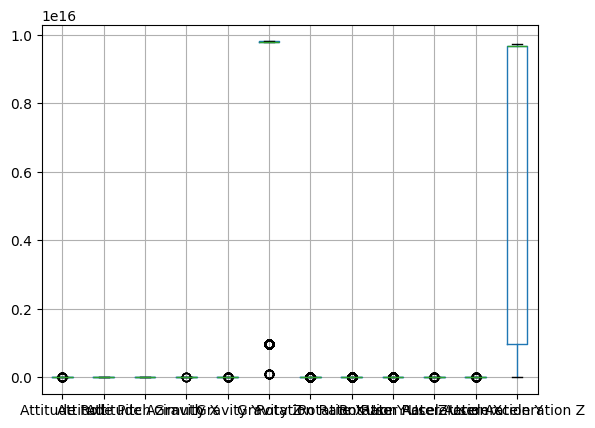

In [107]:
# clone the data1 and data2
data1_clone = data1.copy()
data2_clone = data2.copy()

# drop user acceleration z
# data1_clone = data1_clone.drop(columns=['User Acceleration X','User Acceleration Z', 'Gravity Z', 'Gravity X', 'Rotation Rate Z', 'Rotation Rate Y', 'Rotation Rate X'])

# boxplot
data1_clone.boxplot()
plt.show()

In [108]:
# multiply data1 with constant to fit data2
def fit_data(data1_means, data2_means):
    constants = []
    for i in range(len(data1_means)):
        constants.append(data2_means[i] / data1_means[i])
    return constants

In [109]:
constants = fit_data(data1_mean, data2_mean)
print(constants)

[17.18989892681893, 39.311879707500445, -0.050610925479363716, -1.4198266425558094e-10, 0.9185861709778075, -1.0915589395809494e-16, -1.4156483199013e-13, 1.8071220685139164e-14, -2.322141059581997e-14, 0.07598481337866529, 0.00906790805733115, -1.0951194438917935e-18]


C:\Users\rayha\AppData\Local\Temp\ipykernel_11576\4027147284.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  constants.append(data2_means[i] / data1_means[i])


In [110]:
# multiply data1 with constants
data1_fit = data1 * constants

# find mean of each column
data1_fit_mean = data1_fit.mean()

In [111]:
# compare mean of data1_fit and data2
print(data1_fit_mean)
print(data2_mean)

Attitude Roll          0.3025
Attitude Pitch        -0.3627
Attitude Azimuth       0.0200
Gravity X              0.2784
Gravity Y              0.3546
Gravity Z             -0.8910
Rotation Rate X        0.0002
Rotation Rate Y       -0.0008
Rotation Rate Z        0.0009
User Acceleration X    0.0027
User Acceleration Y    0.0034
User Acceleration Z   -0.0077
dtype: float64
attitude.roll         0.3025
attitude.pitch       -0.3627
attitude.yaw          0.0200
gravity.x             0.2784
gravity.y             0.3546
gravity.z            -0.8910
rotationRate.x        0.0002
rotationRate.y       -0.0008
rotationRate.z        0.0009
userAcceleration.x    0.0027
userAcceleration.y    0.0034
userAcceleration.z   -0.0077
dtype: float64


In [112]:
# Check head
data1_fit.head()

,Attitude Roll,Attitude Pitch,Attitude Azimuth,Gravity X,Gravity Y,Gravity Z,Rotation Rate X,Rotation Rate Y,Rotation Rate Z,User Acceleration X,User Acceleration Y,User Acceleration Z
0,0.3081,-0.3539,0.0205,-0.0000,0.3394,-1.0697,-0.0000,0.0000,0.0000,0.0044,0.0035,-0.0106
1,0.3081,-0.3539,0.0205,-0.0000,0.3395,-1.0697,0.0000,0.0000,0.0000,0.0018,0.0034,-0.0011
2,0.3081,-0.3539,0.0205,-0.0000,0.3401,-1.0697,-0.0000,0.0000,-0.0148,-0.0004,0.0035,-0.0106
3,0.3081,-0.3539,0.0205,-0.0000,0.3403,-1.0697,0.0000,0.0000,-0.0000,-0.0008,0.0034,-0.0011
4,0.3081,-0.3539,0.0205,-0.0000,0.3403,-1.0697,0.0000,0.0000,-0.0000,-0.0008,0.0034,-0.0011


In [113]:
# Check head
data2.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,0.3511,-0.4163,-0.0980,0.3146,0.4044,-0.8588,-0.0037,0.0096,-0.0002,0.0001,0.0003,-0.0070
1,0.3512,-0.4164,-0.0980,0.3146,0.4044,-0.8587,-0.0079,0.0075,0.0008,-0.0013,0.0023,-0.0103
2,0.3511,-0.4165,-0.0980,0.3146,0.4046,-0.8587,-0.0080,-0.0011,-0.0024,-0.0022,0.0000,-0.0067
3,0.3508,-0.4167,-0.0981,0.3143,0.4047,-0.8587,-0.0005,-0.0064,-0.0013,0.0017,0.0092,-0.0116
4,0.3509,-0.4169,-0.0980,0.3143,0.4049,-0.8587,-0.0016,-0.0043,0.0062,0.0058,0.0075,-0.0089


In [114]:
# Set pandas float format
pd.options.display.float_format = '{:.4f}'.format

# check range of each column of data 1
data1_range = data1_fit.max() - data1_fit.min()

# print full range of each column without exponential
print(data1_range)

Attitude Roll                   0.0298
Attitude Pitch                  0.0391
Attitude Azimuth                0.0008
Gravity X                     427.9358
Gravity Y                       0.0401
Gravity Z                       1.0590
Rotation Rate X                 1.2373
Rotation Rate Y                 0.1753
Rotation Rate Z                 0.2167
User Acceleration X   90877836800.8837
User Acceleration Y             0.0020
User Acceleration Z             0.0106
dtype: float64


In [115]:
data2_range = data2.max() - data2.min()
data2_range

attitude.roll        0.2080
attitude.pitch       0.2775
attitude.yaw         0.2801
gravity.x            0.1909
gravity.y            0.2608
gravity.z            0.1075
rotationRate.x       1.3274
rotationRate.y       0.7379
rotationRate.z       1.3023
userAcceleration.x   0.4380
userAcceleration.y   0.2358
userAcceleration.z   0.2719
dtype: float64

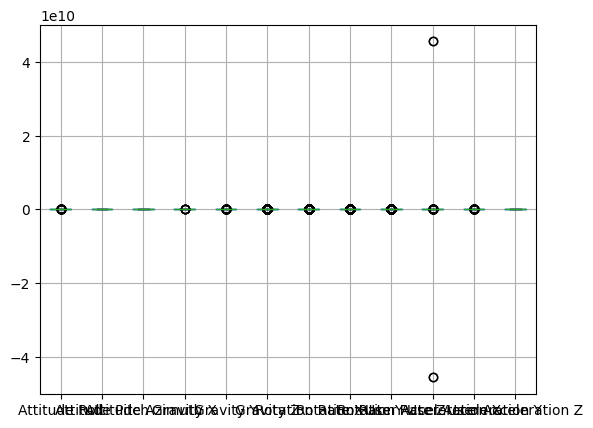

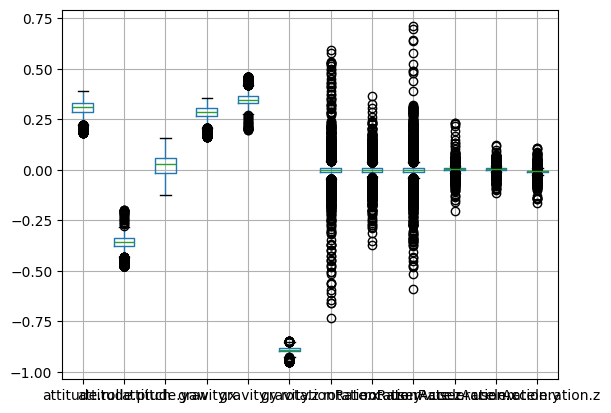

In [116]:
# box plot data1_fit and data2
# data1_fit = data1_fit.drop(columns=['User Acceleration Z'])
data1_fit.boxplot()
plt.show()

data2.boxplot()
plt.show()

In [117]:
# dropping outliers of data1_fit
# drop max and minimum values of gravity x of data1_fit 
data1_fit = data1_fit.drop(data1_fit[data1_fit['Gravity X'] == data1_fit['Gravity X'].max()].index)
data1_fit = data1_fit.drop(data1_fit[data1_fit['Gravity X'] == data1_fit['Gravity X'].min()].index)

In [118]:
data1_fit = data1_fit.drop(data1_fit[data1_fit['User Acceleration X'] == data1_fit['User Acceleration X'].max()].index)
data1_fit = data1_fit.drop(data1_fit[data1_fit['User Acceleration X'] == data1_fit['User Acceleration X'].min()].index)

In [121]:
# drop gravity z above -0.75
data1_fit = data1_fit.drop(data1_fit[data1_fit['Gravity Z'] > -0.75].index)


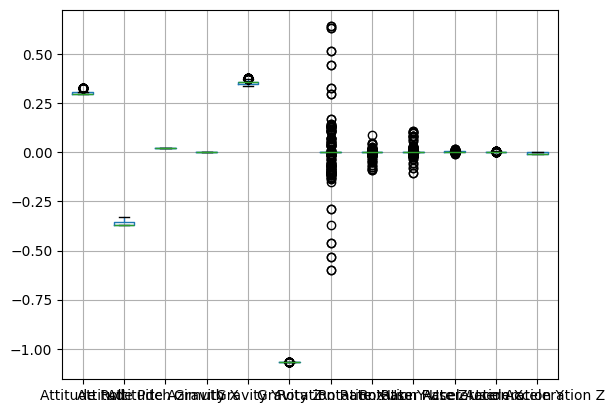

In [122]:
# box plot again
data1_fit.boxplot()
plt.show()

In [123]:
# export data1_fit to csv
data1_fit.to_csv('android_data/sensorfitmotion15_fit.csv', sep=',', index=False)